In [1]:
import torchvision.models as models
from torchvision.models.resnet import ResNet18_Weights
import torch
from torch import nn

In [2]:
resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
resnet = torch.nn.Sequential(*(list(resnet.children())[:-1]))

In [3]:
resnet

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [4]:
menets = nn.Sequential(resnet, nn.Flatten(), nn.Linear(512, 3))

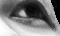

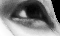

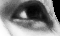

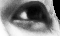

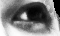

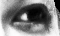

[None, None, None, None, None, None]

In [5]:
from zipfile import ZipFile
from PIL import Image
from glob import glob

image_list = []

for data in glob("data/s00/synth/159_left.zip"):
    
    with ZipFile(data) as archive:
        
        for entry in archive.infolist():
            
            with archive.open(entry) as file:
                img = Image.open(file)
                image_list.append(img)
                img.load()
                
list(map(display, image_list[:6]))

In [6]:
import pandas as pd
import numpy as np

gaze_list = []

for csv_file in glob("data/s00/synth/159_left.csv"):
    df = pd.read_csv(csv_file, header=None)
    gaze_list.append(df[[0,1,2]].values)

gaze_list = np.array(gaze_list)

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
menets = menets.to(device)
device

device(type='cuda', index=0)

In [8]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

image_tensor = [transform(i) for i in image_list]
image_tensor = torch.cat(image_tensor).float()[:,None,...]

image_tensor = image_tensor.repeat(1, 1, 3, 1, 1)
image_tensor.shape

torch.Size([1, 144, 3, 36, 60])

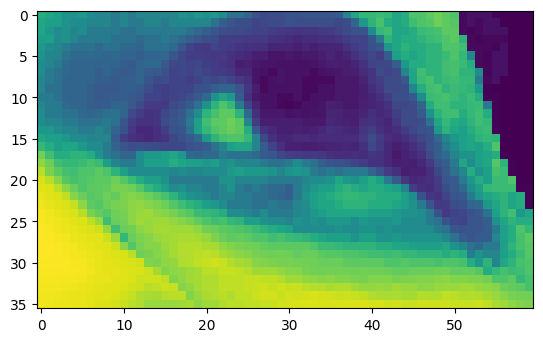

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image_tensor[0][0][0])

In [10]:
gaze_tensor = torch.tensor(gaze_list).float()
gaze_tensor.shape

torch.Size([1, 144, 3])

In [11]:
def train(model, criterion, optimizer, n_epochs, train_data, train_label):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        
        for i, batch in enumerate(train_data):
            batch, label = batch.to(device), train_label[i].to(device)
            output = model(batch)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, 
            loss.item()
            ))

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(resnet.parameters())

train(menets, criterion, optimizer, 10, image_tensor, gaze_tensor)

Epoch: 1 	Training Loss: 0.984320
Epoch: 2 	Training Loss: 3.616239
Epoch: 3 	Training Loss: 7.835824
Epoch: 4 	Training Loss: 2.515704
Epoch: 5 	Training Loss: 1.262661
Epoch: 6 	Training Loss: 0.479237
Epoch: 7 	Training Loss: 0.284395
Epoch: 8 	Training Loss: 0.204056
Epoch: 9 	Training Loss: 0.131614
Epoch: 10 	Training Loss: 0.063910
